## Multi class image classification

In [ ]:
### here, in this file I will just build a baseline model and try to predict our dataset
### of the images, then afterwards I will use some transfer learning and see the results on the same

### ---------------loading libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential, load_model

### -------------loading the data

In [9]:
X_train = np.load('../data/preprocessed/train/X_train.npy')
y_train = np.load('../data/preprocessed/train/y_train.npy')

In [10]:
X_test = np.load('../data/preprocessed/test/X_test.npy')
y_test = np.load('../data/preprocessed/test/y_test.npy')

In [11]:
print(f"{X_train.shape} : {y_train.shape} :: {X_test.shape} : {y_test.shape}")

(4223, 224, 224, 3) : (4223,) :: (1408, 224, 224, 3) : (1408,)


### -----------------making a baseline model

In [13]:
model = Sequential()

In [14]:
model = Sequential([
    Conv2D(64, activation = 'relu', kernel_size = (3, 3), input_shape = (224, 224, 3)),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(128, activation = 'relu', kernel_size = (3, 3)),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(128, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(128, kernel_size = (3, 3), activation = 'relu'),
    Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(),
    Dense(128, activation = 'elu'),
    Dense(4, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) 

In [15]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 22, 22, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,436,484 (5.48 MB)

 Trainable params: 1,436,484 (5.48 MB)

 Non-trainable params: 0 (0.00 B)

### training and predictions

In [16]:
model.fit(X_train, y_train, epochs = 3, batch_size = 128, validation_split = 0.1)

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 207s 5s/step - accuracy: 0.4527 - loss: 1.0434 - val_accuracy: 0.6950 - val_loss: 0.5972
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 158s 5s/step - accuracy: 0.7109 - loss: 0.5028 - val_accuracy: 0.6690 - val_loss: 0.4722
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 154s 5s/step - accuracy: 0.7132 - loss: 0.5256 - val_accuracy: 0.7352 - val_loss: 0.4877


In [17]:
y_pred = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 257ms/step


In [19]:
y_pred

array([[3.6840085e-02, 1.4163485e-04, 9.3384594e-02, 8.6963373e-01],
       [3.2154869e-03, 6.1070758e-05, 5.4058611e-01, 4.5613736e-01],
       [5.7656234e-03, 6.8486428e-05, 3.9088380e-01, 6.0328215e-01],
       ...,
       [9.5436418e-01, 4.3987732e-02, 4.0591672e-06, 1.6440531e-03],
       [9.6590114e-01, 3.2932159e-02, 1.7560052e-06, 1.1649241e-03],
       [9.4180846e-01, 3.8620461e-02, 2.4046110e-04, 1.9330529e-02]],
      dtype=float32)

In [20]:
y_pred = np.argmax(y_pred, axis = 1)

In [21]:
y_pred

array([3, 2, 3, ..., 0, 0, 0], dtype=int64)

### metrices and graphs

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7478693181818182
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       419
           1       0.84      0.81      0.82       237
           2       0.98      0.34      0.50       364
           3       0.60      0.93      0.73       388

    accuracy                           0.75      1408
   macro avg       0.81      0.74      0.73      1408
weighted avg       0.81      0.75      0.73      1408



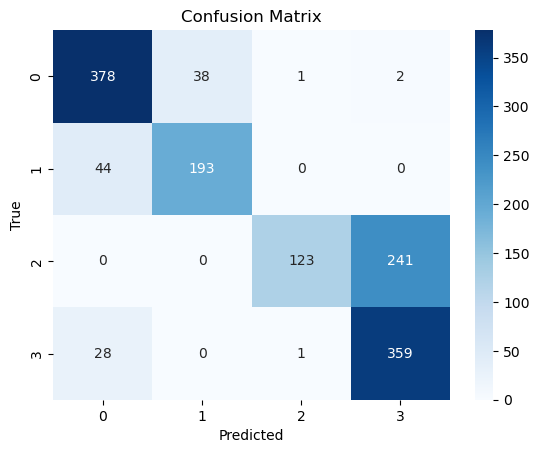

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### saving the model

In [25]:
model.save('../models/baseline.h5')

### --------------------using the transfer learning model